## Importação de bibliotecas

In [2]:
import pandas as pd
import os
from pathlib import Path
from datetime import date
import json
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Análise

In [3]:
df_analyze = pd.read_csv("../data/processed/dados-preprocessados.csv")

## 2.1 Qual é o valor médio das corridas por tipo de serviço (UberX, VIP, Moto)?

In [4]:
df_analyze.head()

,product_type,status,distance,fare_amount,day,month,year,hour_of_day,cost_per_km,day_week
0,UberX,completed,6.32,17.96,18,6,2025,0,2.84,quarta
1,UberX,completed,6.54,24.14,17,6,2025,20,3.69,terça
2,UberX,completed,5.19,17.05,17,6,2025,12,3.29,terça
3,UberX,completed,5.13,15.97,16,6,2025,13,3.11,segunda
4,UberX,completed,5.19,16.95,13,6,2025,13,3.27,sexta


### Filtrando apenas corridas completadas

In [5]:
df_completed = df_analyze[df_analyze['status'] == 'completed']

### Agrupa por tipo de serviço e calcula a média do valor da corrida

In [30]:
df_media_por_tipo = df_completed.groupby('product_type')['fare_amount'].mean().reset_index()

### Ordenando do maior para o menor

In [8]:
df_media_por_tipo = df_media_por_tipo.sort_values(by='fare_amount', ascending=False)

### Transformando o campo "Valor Médio da Corrida (R$)" em um decimal de 2 casas

In [9]:
df_media_por_tipo['fare_amount'] = round(df_media_por_tipo['fare_amount'], 2)
df_media_por_tipo.head()

,product_type,fare_amount
2,Prioridade,25.41
0,Comfort,23.28
3,UberX,17.86
5,uberX VIP,16.33
4,UberX Promo,14.98


## 2.2 Em quais meses o valor médio da corrida é mais alto?


In [10]:
df_analyze.head()

,product_type,status,distance,fare_amount,day,month,year,hour_of_day,cost_per_km,day_week
0,UberX,completed,6.32,17.96,18,6,2025,0,2.84,quarta
1,UberX,completed,6.54,24.14,17,6,2025,20,3.69,terça
2,UberX,completed,5.19,17.05,17,6,2025,12,3.29,terça
3,UberX,completed,5.13,15.97,16,6,2025,13,3.11,segunda
4,UberX,completed,5.19,16.95,13,6,2025,13,3.27,sexta


### Filtrando apenas corridas completas

In [11]:
df_filtrado = df_analyze[df_analyze['status'] == 'completed']

### Agrupando por mês e calculando a média

In [12]:
df_media_mensal = df_filtrado.groupby('month')['fare_amount'].mean().reset_index()

### Ordenando do maior para o menor

In [13]:
df_media_mensal = df_media_mensal.sort_values(by='fare_amount', ascending=False)

In [14]:
df_media_mensal["fare_amount"] = round(df_media_mensal["fare_amount"], 2)

In [15]:
df_media_mensal.head()

,month,fare_amount
10,11,21.40
9,10,21.02
11,12,19.33
7,8,18.56
6,7,17.78


## 2.3 Qual o valor médio das corridas por dia da semana?

In [16]:
df_vl_médio_dia_semana = df_analyze.groupby('day_week') \
       .agg({'fare_amount':'mean'}) \
       .sort_values(by="fare_amount", ascending=False) \
       .reset_index()
df_vl_médio_dia_semana

,day_week,fare_amount
0,segunda,18.109706
1,terça,17.965706
2,sexta,17.796051
3,sábado,17.187059
4,quarta,16.920621
5,quinta,16.624085
6,domingo,15.359091


In [17]:
# Salvar em Analytics - Dados agregados, sumarizados ou prontos para visualização
caminho_analytics = Path('Data_Lake/analytics')
caminho_analytics.mkdir(parents=True, exist_ok=True)

df_vl_médio_dia_semana.to_csv(f'{caminho_analytics}/gastos_dia_semana.csv', index=False)

## 2.4 Em quais horários do dia as corridas tendem a ser mais caras por quilômetro?


In [19]:
df_analyze.head()

,product_type,status,distance,fare_amount,day,month,year,hour_of_day,cost_per_km,day_week
0,UberX,completed,6.32,17.96,18,6,2025,0,2.84,quarta
1,UberX,completed,6.54,24.14,17,6,2025,20,3.69,terça
2,UberX,completed,5.19,17.05,17,6,2025,12,3.29,terça
3,UberX,completed,5.13,15.97,16,6,2025,13,3.11,segunda
4,UberX,completed,5.19,16.95,13,6,2025,13,3.27,sexta


### Remove valores extremos (outliers)

In [ ]:
df_analyze = df_analyze[df_analyze['cost_per_km'] < 100]

### Agrupa por hora e calcula a média do valor por km

In [ ]:
media_valor_por_km = df_analyze.groupby('hour_of_day')['cost_per_km'].mean().reset_index()

### Exibe a tabela

In [ ]:
media_valor_por_km.head(24)

,hour_of_day,cost_per_km
0,0,3.442400
1,1,3.743077
2,2,4.126071
3,3,4.864167
4,4,4.711429
5,5,3.476667
6,6,6.450000
7,9,2.556667
8,10,4.371765
9,11,3.801042


## 2.5 Em quais dias e horários ocorrem mais cancelamentos de corrida? (Andresson)

In [29]:
df_analyze["status"].drop_duplicates()

0    completed
Name: status, dtype: object

In [27]:
df_cancelados = df_analyze[df_analyze['status'].isin(['rider_canceled', 'driver_canceled'])]

# Agrupar por dia da semana e hora
df_cancelamentos_dia_hora = df_cancelados.groupby(['day_week', 'hour_of_day']) \
                                         .size() \
                                         .reset_index(name='cancelled') \
                                         .sort_values(by='cancelled', ascending=False)

df_cancelamentos_dia_hora

,day_week,hour_of_day,cancelled


# 📊 3. Gráficos

## 3.1 Qual é o valor médio das corridas por tipo de serviço (UberX, VIP, Moto)?

<Axes: xlabel='fare_amount', ylabel='product_type'>

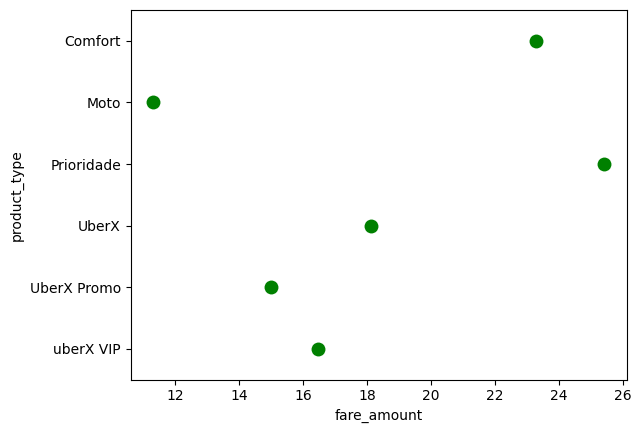

In [31]:
sns.stripplot(x='fare_amount', y='product_type', size=10, color='green', data=df_media_por_tipo)

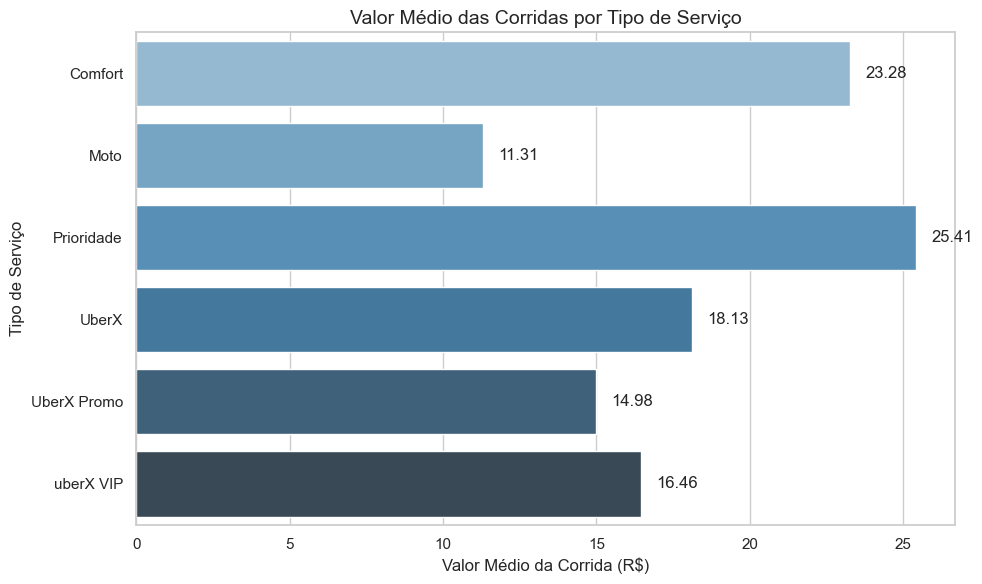

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Cria o gráfico e guarda o objeto do eixo
ax = sns.barplot(
    data=df_media_por_tipo,
    x='fare_amount',
    y='product_type',
    hue='product_type',
    palette='Blues_d',
    legend=False
)

# Adiciona os valores em cima das barras
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.5, y, f'{width:.2f}', va='center')

# Títulos e rótulos
plt.title('Valor Médio das Corridas por Tipo de Serviço', fontsize=14)
plt.xlabel('Valor Médio da Corrida (R$)')
plt.ylabel('Tipo de Serviço')

plt.tight_layout()
plt.show()

## 3.2 Em quais meses o valor médio da corrida é mais alto?

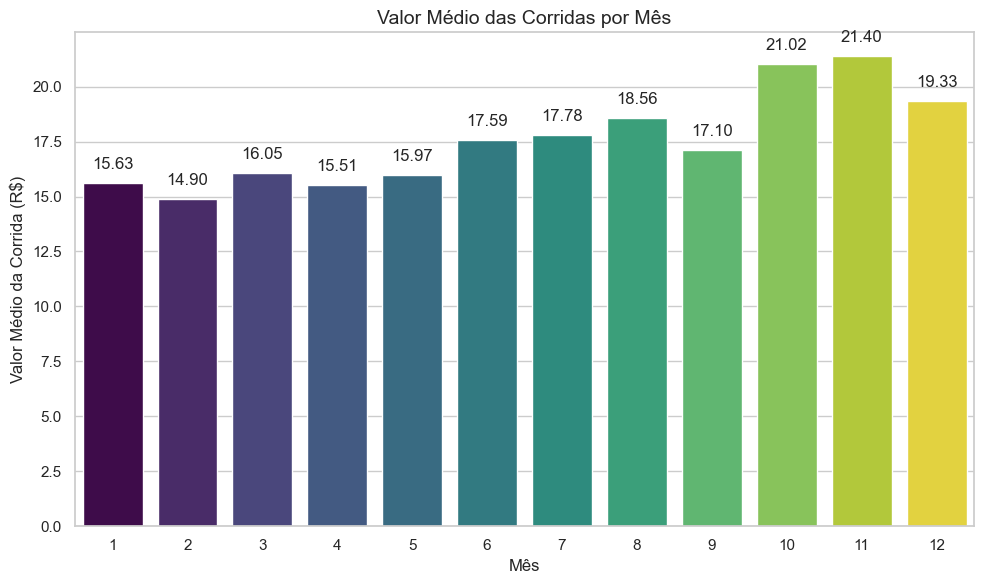

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_media_mensal,
    x='month',
    y='fare_amount',
    hue='month',
    palette='viridis',
    legend=False
)

# Adiciona os valores acima das barras
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

# Títulos e rótulos
plt.title('Valor Médio das Corridas por Mês', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Valor Médio da Corrida (R$)')

plt.tight_layout()
plt.show()

## 3.3 Qual o valor médio das corridas por dia da semana?

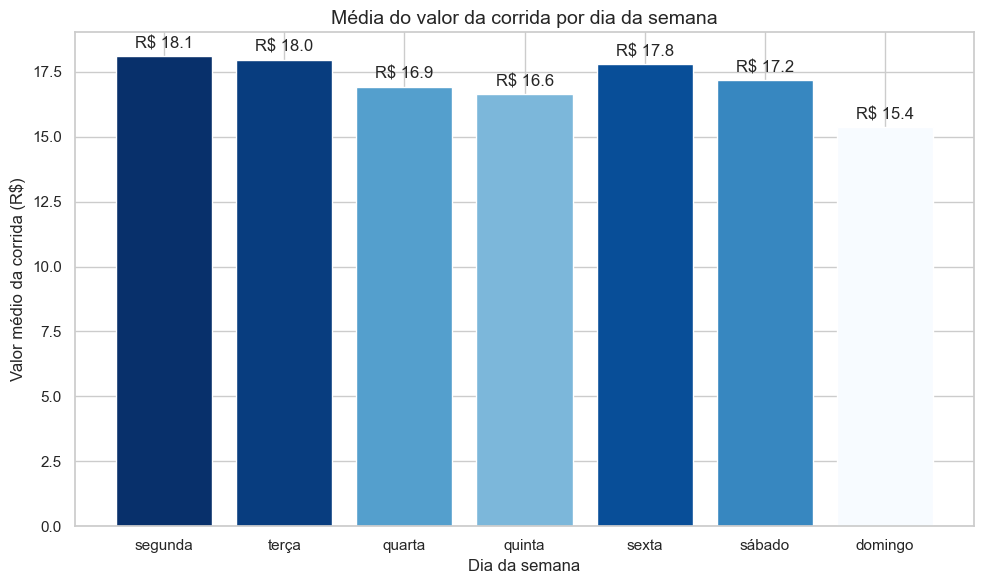

In [34]:

# Ordem correta dos dias da semana
order_days = ['segunda','terça','quarta','quinta','sexta','sábado','domingo']
df_plot = df_vl_médio_dia_semana.set_index('day_week').loc[order_days].reset_index()

# Estilo
norm = plt.Normalize(df_plot['fare_amount'].min(), df_plot['fare_amount'].max())
cmap = sns.color_palette("Blues", as_cmap=True)
colors = [cmap(norm(valor)) for valor in df_plot['fare_amount']]
sns.set(style="whitegrid")

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(df_plot['day_week'], df_plot['fare_amount'], color=colors)
plt.title('Média do valor da corrida por dia da semana', fontsize=14)
plt.xlabel('Dia da semana')
plt.ylabel('Valor médio da corrida (R$)')

# Mostrar os valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'R$ {height:.1f}', ha='center')

plt.tight_layout()
plt.show()


## 3.4 Em quais horários do dia as corridas tendem a ser mais caras por quilômetro?

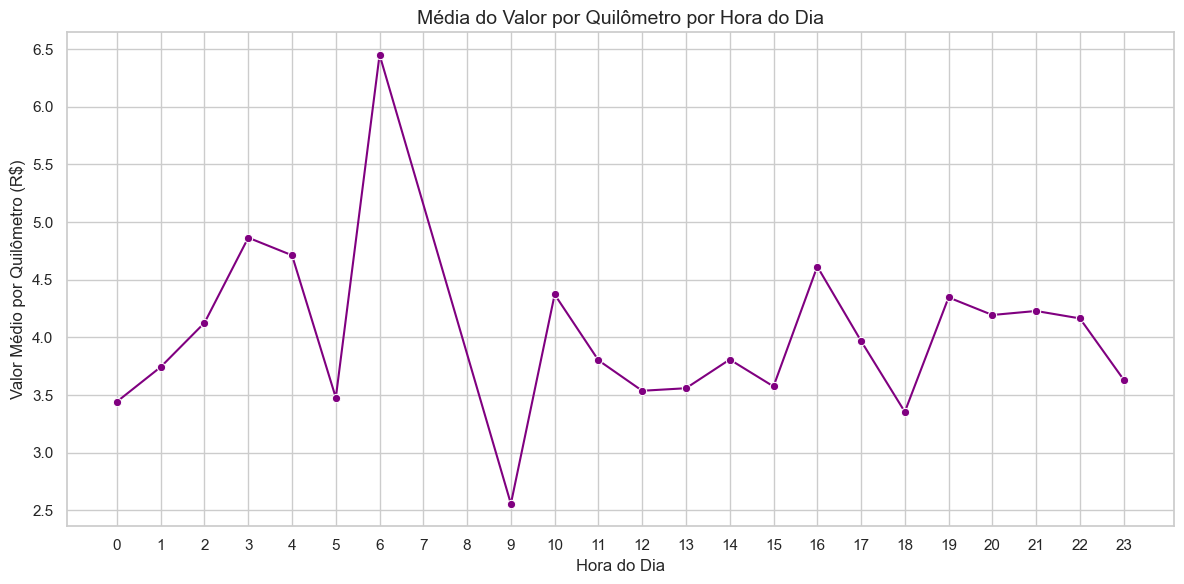

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_valor_por_km, x='hour_of_day', y='cost_per_km', marker='o', color='purple')
plt.title('Média do Valor por Quilômetro por Hora do Dia', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Valor Médio por Quilômetro (R$)', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

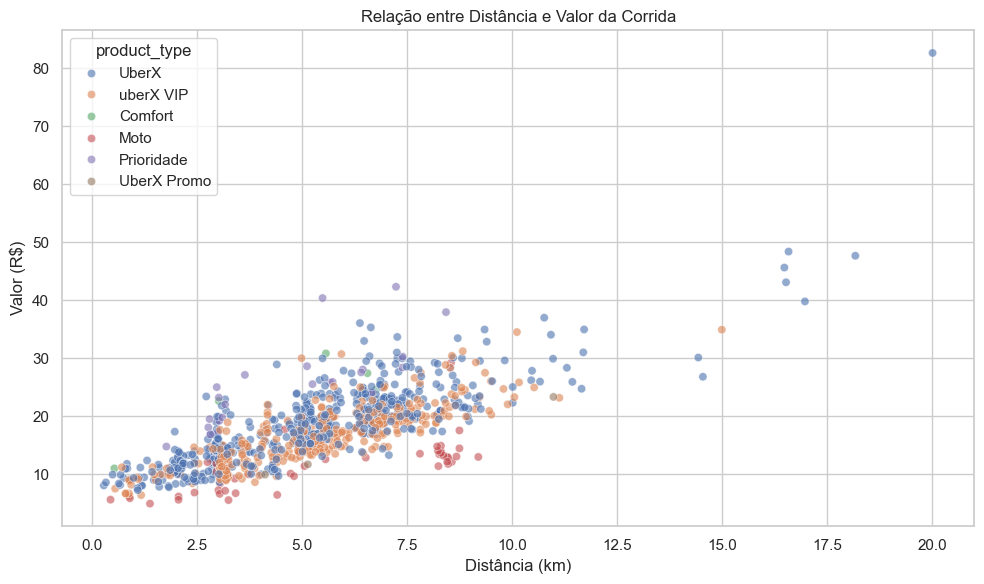

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analyze, x='distance', y='fare_amount', hue='product_type', alpha=0.6)
plt.title('Relação entre Distância e Valor da Corrida')
plt.xlabel('Distância (km)')
plt.ylabel('Valor (R$)')
plt.tight_layout()
plt.show()

## 3.5 Em quais dias e horários ocorrem mais cancelamentos de corrida?

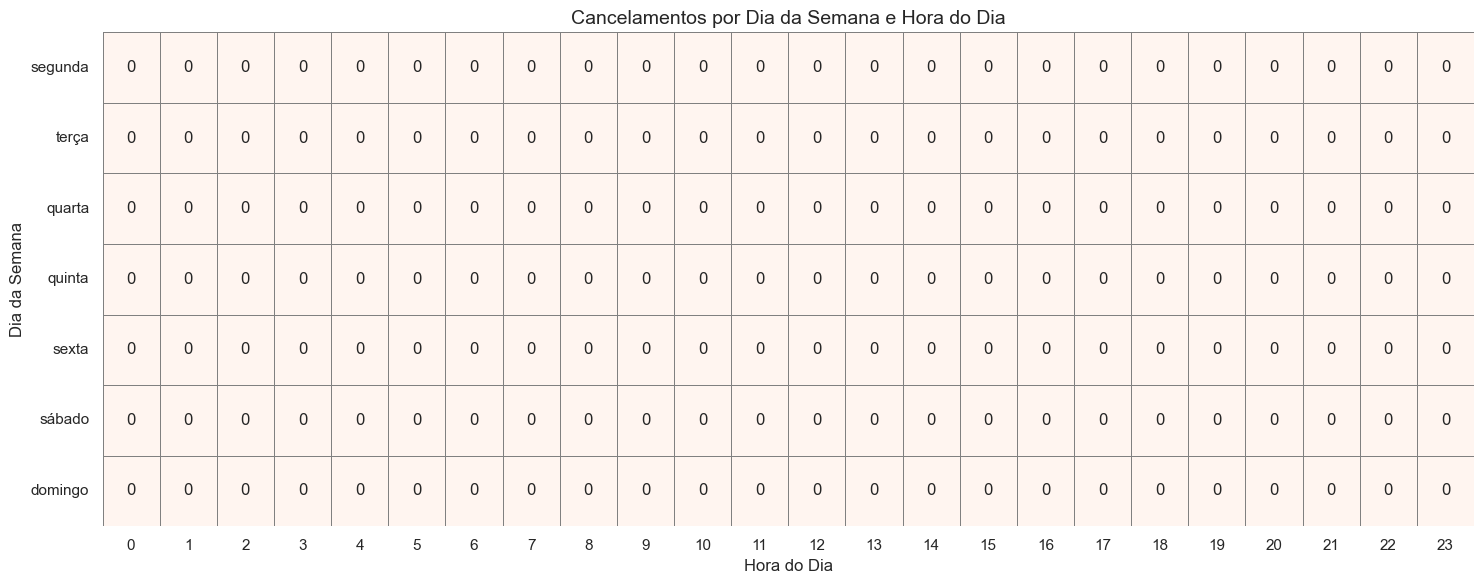

In [ ]:
# Define a ordem correta dos dias da semana
order_days = ['segunda', 'terça', 'quarta', 'quinta', 'sexta', 'sábado', 'domingo']

# Agrupa cancelamentos por dia da semana e hora
df_heat = df_cancelamentos_dia_hora.groupby(['day_week', 'hour_of_day'])['cancelled'].sum().reset_index()

# Cria produto cartesiano entre dias e horas
dias_df = pd.DataFrame({'day_week': order_days})
horas_df = pd.DataFrame({'hour_of_day': list(range(24))})
base = dias_df.merge(horas_df, how='cross')

# Preenche valores ausentes com zero
df_heat = base.merge(df_heat, on=['day_week', 'hour_of_day'], how='left').fillna(0)
df_heat['cancelled'] = df_heat['cancelled'].astype(int)

# Ordena o campo de dias como categoria
df_heat['day_week'] = pd.Categorical(df_heat['day_week'], categories=order_days, ordered=True)

# Gera tabela para o heatmap
heatmap_data = df_heat.pivot(index='day_week', columns='hour_of_day', values='cancelled')

# Exibe heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', linewidths=0.5, linecolor='gray', cbar=False)
plt.title('Cancelamentos por Dia da Semana e Hora do Dia', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()